In [6]:
from math import log
#计算给定数据的香农熵
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)#入口数 实例总数
    labelCounts={}#字典键值为最后一列数值
    #为所有可能分类创建字典 将所有的标签填入字典key中，并且把Value赋值为1 
    for featVec in dataSet:
        currentLabel=featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries
        #以2为底求对数 信息熵计算公式
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

def createDataSet():
    dataSet = [[ 1, 1, 'yes'], 
               [1, 1, 'yes'], 
               [1, 0, 'no'], 
               [0, 1, 'no'], 
               [0, 1, 'no']] 
    labels = [' no surfacing',' flippers'] 
    return dataSet, labels

myDat,labels=createDataSet()
print(myDat)
calcShannonEnt(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


0.9709505944546686

# 信息熵
信息熵实际上是一种数学期望。其计算公式为
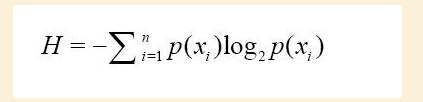
单位是bit。表示含义为 应该使用多少位bit来表示可能出现的情况
举例，对于一本50万字中文书 其中用到的文字有7000个.
则每个可以使用13位bit（8192）来对每一个文字进行编码
假设每一个中文字出现情况都是独立的
根据香农信息熵计算公式可以计算：
H=-(1/7000 * log2 (1/7000))+(1/7000 * log2 (1/7000))+(1/7000 * log2 (1/7000)).....=12.77bit
含义为 期望使用12.77bit来对其中每一个中文字进行编码
所以总的信息量为 50万*12.77bit=638.5万bit
一本书总的信息量为638.5万bit

实际上由于中文上下文语义还有常用字原因，信息熵大约只有5bit

# append 和 extend区别
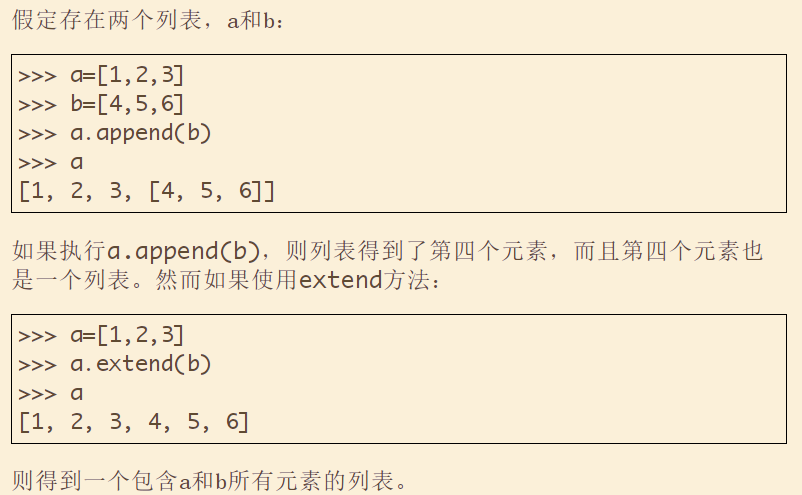


In [ ]:
#按照给定特征划分数据集
def splitDataSet(dataSet,axis,value):
    #创建新的list对象
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            #抽取 其含义是吧dataSet中每个元素第axis位置和value相等的值删掉
            #重新组成一个列表，之后把这列列表组成一个大列表
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

#熵计算选择最好的划分方式
def chooseBestFestureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1#包含的特征属性数量
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain=0.0
    bestFeature=-1
    for i in range(numFeatures):
        #创建唯一的分类标签列表
        featList=[example[i] for example in dataSet]#取dataSet中每个元素（为一个列表）中的第i个元素组成一个新的列表
        uniqueVals=set(featList)#set函数创建一个不重复的集合
        newEntropy=0.0
    #计算每种划分方式的信息熵
    for value in uniqueVals:
        subDataSet=splitDataSet(dataSet, i, value)
        prob=len(subDataSet)/float(len(dataSet))
        newEntropy+=prob*calcShannonEnt(subDataSet)
    infoGain=baseEntropy-newEntropy
    if infoGain>bestInfoGain:
        bestInfoGain=infoGain
        bestFeature=i
    return bestFeature